In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows

In [ ]:
df = pd.read_csv('2018-2021-missing-encoding.csv')

In [ ]:
df.shape

(509811, 36)

In [ ]:
df['Amount']= df['Incident Description'].str.split(',').str[-1].to_frame(name = 'Amount')
df = df[~df['Amount'].str.contains("[a-zA-Z]").fillna(False)]
df = df[~df['Amount'].str.contains('400')]
df.isnull().sum()

Unnamed: 0                          0
Incident Datetime                   0
Incident Date                       0
Incident Time                       0
Incident Year                       0
Incident Day of Week                0
Report Datetime                     0
Row ID                              0
Incident ID                         0
Incident Number                     0
Report Type Code                    0
Report Type Description             0
Filed Online                        0
Incident Code                       0
Incident Category                   1
Incident Subcategory                1
Incident Description                0
Resolution                          0
Intersection                    13703
CNN                             13703
Police District                     0
Analysis Neighborhood           13713
Supervisor District                 0
Latitude                        13703
Longitude                       13703
Point                           13703
Neighborhood

In [ ]:
df['Amount'].value_counts()

 >$950        68155
 $50-$200     16526
 $200-$950    14447
 <$50          4030
Name: Amount, dtype: int64

In [ ]:
df.head()

,Unnamed: 0,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Neighborhoods,Current Supervisor Districts,Current Police Districts,Incident Category_encoded,Incident Subcategory_encoded,Incident Day of Week_encoded,Incident Datetime_encoded,Resolution_encoded,Intersection_encoded,Police District_encoded,Amount
0,0,3/5/2019 21:00,3/5/2019,21:00,2019,Tuesday,3/7/2019 12:54,7.780871e+10,778087,196048512,II,Coplogic Initial,1,6372,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, $50-$200",Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,30044000.0,Tenderloin,Tenderloin,6.0,37.779992,-122.413487,POINT (-122.41348740024354 37.77999173926721),21.0,10.0,5.0,18,29,5,109333,2,5820,10,$50-$200
2,2,8/24/2018 17:30,8/24/2018,17:30,2018,Friday,8/24/2018 19:35,7.067531e+10,706753,180639339,II,Initial,0,6243,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, $200-$950",Open or Active,PERU AVE \ BURROWS ST,21610000.0,Ingleside,Excelsior,9.0,37.723944,-122.422830,POINT (-122.42283006837721 37.72394419349765),90.0,2.0,9.0,18,26,0,207735,2,4543,2,$200-$950
5,5,2/12/2019 7:00,2/12/2019,7:00,2019,Tuesday,2/12/2019 9:20,7.696241e+10,769624,190106328,II,Initial,0,6304,Larceny Theft,Larceny Theft - From Building,"Theft, From Building, >$950",Open or Active,NEW MONTGOMERY ST \ JESSIE ST,24620000.0,Southern,Financial District/South Beach,6.0,37.787890,-122.401043,POINT (-122.40104304688674 37.787889612676835),0.0,10.0,6.0,18,28,5,74104,2,4229,8,>$950
21,21,11/18/2018 20:20,11/18/2018,20:20,2018,Sunday,11/18/2018 21:10,7.389571e+10,738957,180875862,II,Initial,0,6244,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,GEARY BLVD \ PRESIDIO AVE,26834000.0,Richmond,Lone Mountain/USF,2.0,37.782488,-122.445820,POINT (-122.4458205129012 37.782488031626265),13.0,6.0,8.0,18,26,3,44531,2,2896,7,>$950
23,23,12/16/2018 16:45,12/16/2018,16:45,2018,Sunday,12/16/2018 17:44,7.486741e+10,748674,180946764,II,Initial,0,6301,Larceny Theft,Larceny Theft - From Building,"Theft, From Building, <$50",Open or Active,ANZA ST \ ARGUELLO BLVD,27225000.0,Richmond,Lone Mountain/USF,1.0,37.779333,-122.458732,POINT (-122.45873162377274 37.77933315786935),5.0,4.0,8.0,18,28,3,59099,2,1278,7,<$50


In [ ]:
df['time_hour'] = pd.to_datetime(df['Incident Time'], format='%H:%M').dt.hour
df['Incident Month'] = pd.DatetimeIndex(df['Incident Date']).month

In [ ]:
df_18_19_20 = df.loc[(df['Incident Year'] == 2018) | (df['Incident Year'] == 2019) | (df['Incident Year'] == 2020)]


In [ ]:
df = df_18_19_20.loc[(df['Incident Category'] == 'Larceny Theft')]

In [ ]:
df.shape

(114888, 39)

In [ ]:
df['Amount'] = df['Amount'].replace(['>$950'],'High')

In [ ]:
df.drop(columns = 'Incident ID', inplace = True)
df.drop(columns = 'Incident Number', inplace = True)
df.drop(columns = 'Incident Code', inplace = True)
df.drop(columns = 'Incident Description', inplace = True) #sinh ra tu bien du doan
df.drop(columns = 'CNN', inplace = True)
df.drop(columns = 'Unnamed: 0', inplace = True)
df.drop(columns = 'Unnamed: 0.1', inplace = True)
df.drop(columns = 'Current Supervisor Districts', inplace = True)
df.drop(columns = 'Current Police Districts', inplace = True)
df.drop(columns = 'Neighborhoods', inplace = True)

In [ ]:
df.shape

(114888, 39)

Amount           $200-$950   $50-$200   <$50   >$950
Incident Month                                      
1                     1408       1700    360    7743
2                     1226       1535    300    6319
3                     1123       1546    337    5809
4                     1017       1401    345    5336
5                     1134       1459    354    5759
6                     1111       1459    323    6042
7                     1283       1639    337    7135
8                     1378       1669    324    7297
9                     1275       1505    325    6414
10                    1248       1556    344    6923
11                    1125       1534    311    6262
12                    1165       1733    373    6587


<AxesSubplot:xlabel='Incident Month'>

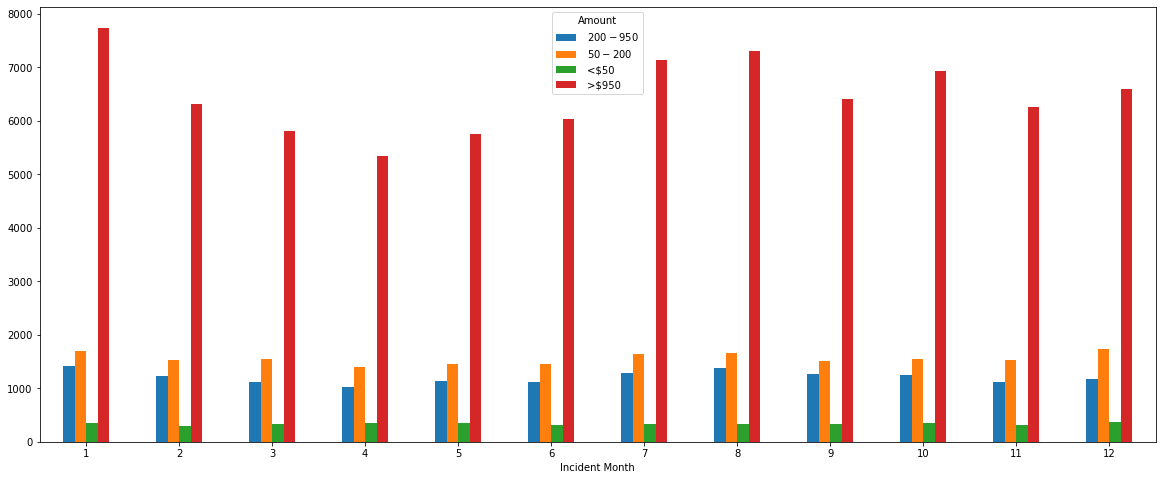

In [ ]:
CrosstabResult=pd.crosstab(index=df['Incident Month'],columns=df['Amount'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(20,8), rot=0)

Amount                          $200-$950   $50-$200   <$50   >$950
Incident Subcategory                                               
Larceny - Auto Parts                  129         41     14     442
Larceny - From Vehicle               6829       2511   1580   60466
Larceny Theft - Bicycle               668         79      0     792
Larceny Theft - From Building        2378       1245    870    3216
Larceny Theft - Other                1100      12958    594   10250
Larceny Theft - Pickpocket            707        412    158     437
Larceny Theft - Purse Snatch           36         14      3      22
Larceny Theft - Shoplifting          2646       1476    814    2001


<AxesSubplot:xlabel='Incident Subcategory'>

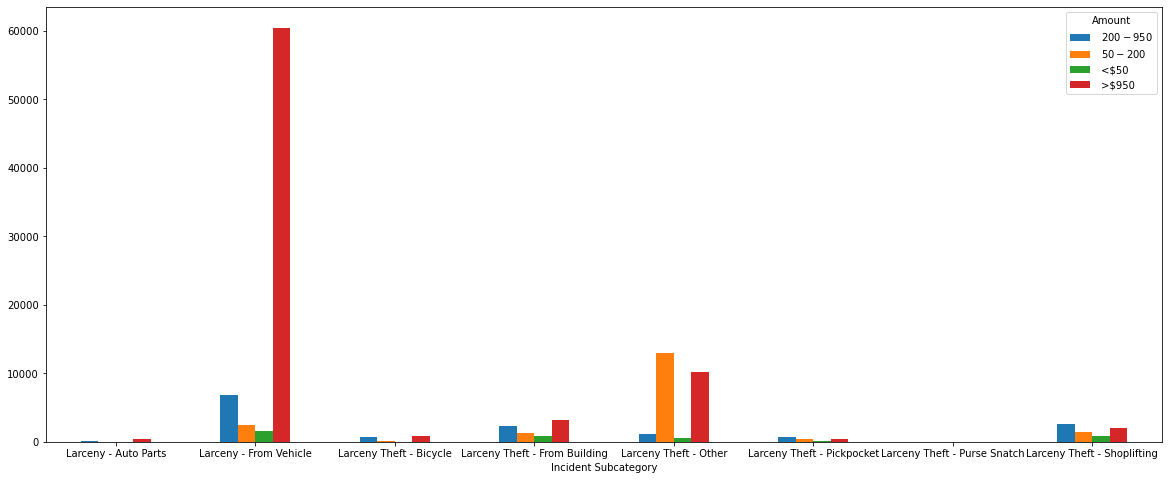

In [ ]:
CrosstabResult=pd.crosstab(index=df['Incident Subcategory'],columns=df['Amount'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(20,8), rot=0)

Amount            $200-$950   $50-$200   <$50   >$950
Police District                                      
Bayview                 824       1028    326    4155
Central                3633       3546    687   15949
Ingleside               875       1078    452    3186
Mission                1378       2419    446    8450
Northern               2082       2982    596   16280
Out of SF                55        412     12     723
Park                    708        887    202    4153
Richmond               1086       1251    272    7482
Southern               1617       2133    380    9399
Taraval                1093       1428    379    4813
Tenderloin             1142       1572    281    3036


<AxesSubplot:xlabel='Police District'>

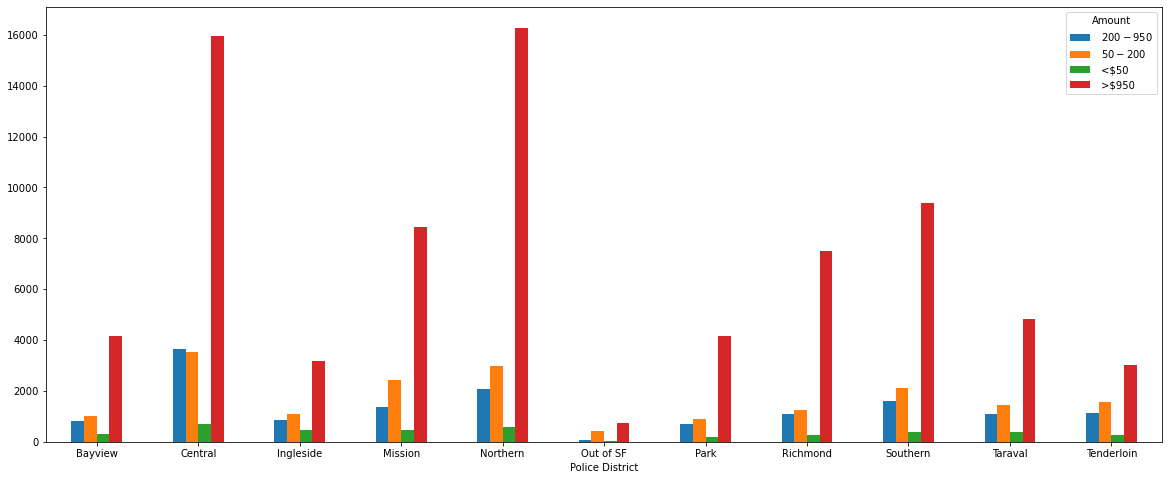

In [ ]:
CrosstabResult=pd.crosstab(index=df['Police District'],columns=df['Amount'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(20,8), rot=0)

Amount                $200-$950   $50-$200   <$50   >$950
Supervisor District                                      
0.0                          46       2210      3    9471
1.0                         814        795    193    4686
2.0                        1396       1494    342    8677
3.0                        3684       3482    719   12973
4.0                         359        406    160    1406
5.0                        1485       1794    410   10753
6.0                        2503       3157    687   10946
7.0                         790        908    247    2972
8.0                        1025       1564    330    5374
9.0                        1055       1327    376    4564
10.0                        944       1164    373    4829
11.0                        392        435    193     975


<AxesSubplot:xlabel='Supervisor District'>

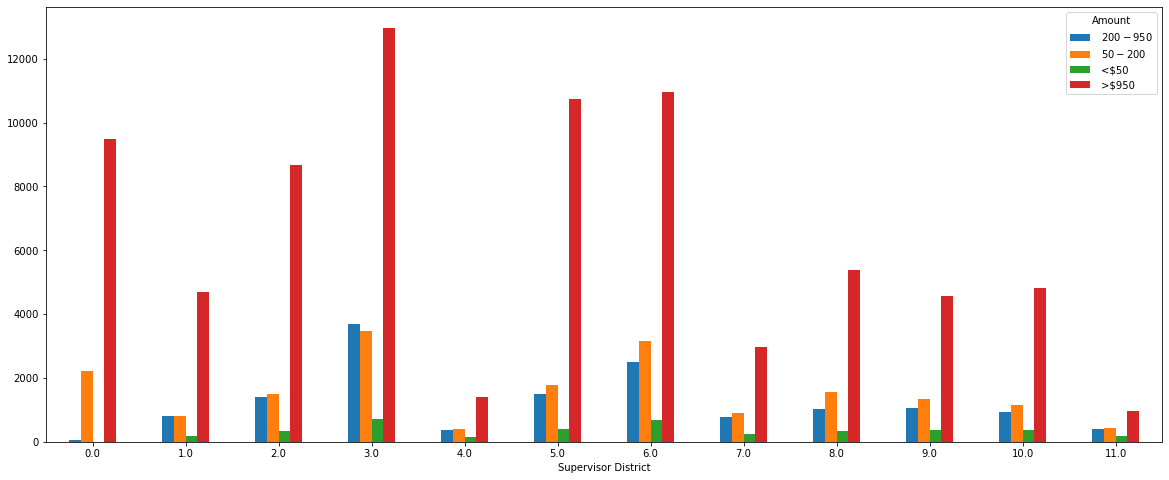

In [ ]:
CrosstabResult=pd.crosstab(index=df['Supervisor District'],columns=df['Amount'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(20,8), rot=0)

Amount                 $200-$950   $50-$200   <$50   >$950
Incident Day of Week                                      
Friday                      2257       3083    620   12178
Monday                      2007       2561    586   10569
Saturday                    2245       2967    539   11941
Sunday                      1920       2449    584   11337
Thursday                    2066       2529    537   10626
Tuesday                     1990       2440    623   10113
Wednesday                   2008       2707    544   10862


<AxesSubplot:xlabel='Incident Day of Week'>

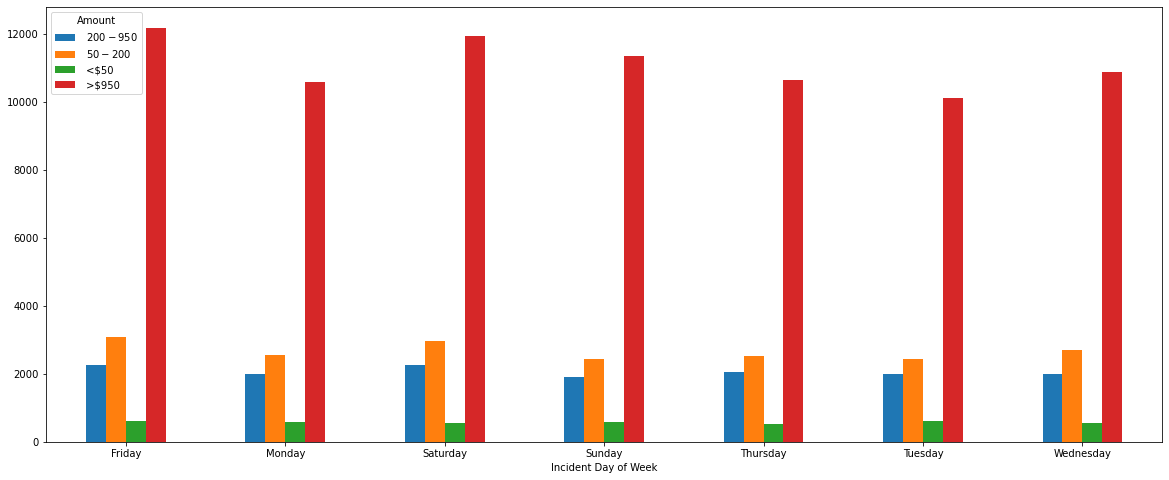

In [ ]:
CrosstabResult=pd.crosstab(index=df['Incident Day of Week'],columns=df['Amount'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(20,8), rot=0)

Amount          $200-$950   $50-$200   <$50   >$950
Incident Year                                      
2018                 5533       7115   1430   30425
2019                 5548       6824   1405   30046
2020                 3412       4797   1198   17155


<AxesSubplot:xlabel='Incident Year'>

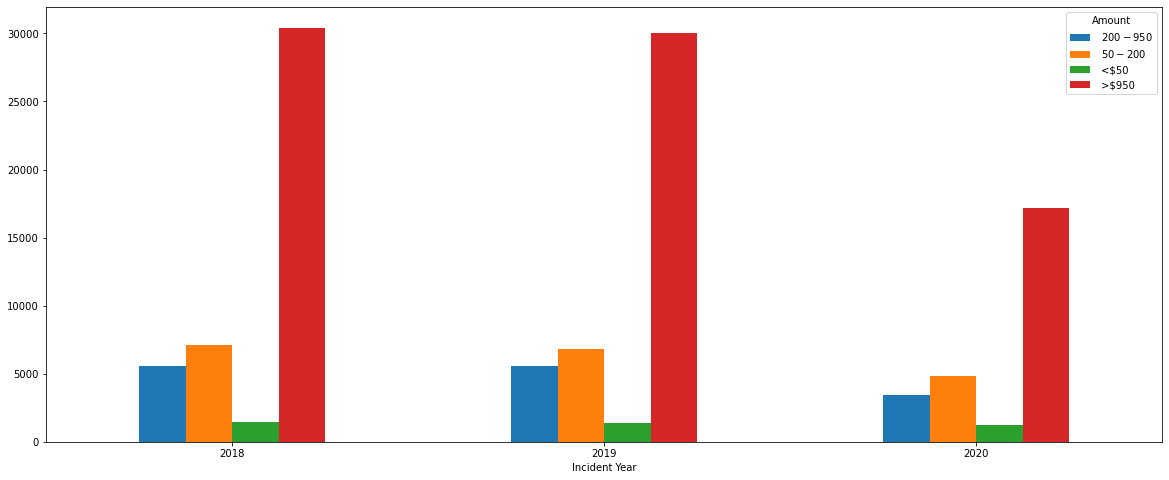

In [ ]:
CrosstabResult=pd.crosstab(index=df['Incident Year'],columns=df['Amount'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(20,8), rot=0)

Amount                    $200-$950   $50-$200   <$50   >$950
Report Type Description                                      
Coplogic Initial                179      11200      0   48523
Coplogic Supplement               6        944      0    6216
Initial                       13680       6341   3851   21004
Initial Supplement              615        243    176    1817
Vehicle Initial                  10          8      5      40
Vehicle Supplement                3          0      1      26


<AxesSubplot:xlabel='Report Type Description'>

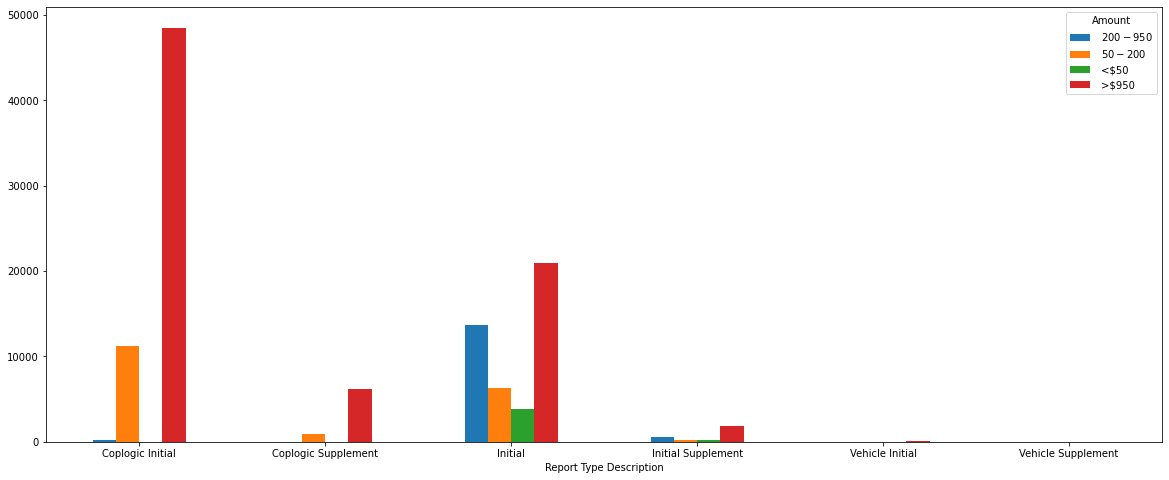

In [ ]:
CrosstabResult=pd.crosstab(index=df['Report Type Description'],columns=df['Amount'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(20,8), rot=0)

Amount             $200-$950   $50-$200   <$50   >$950
Report Type Code                                      
II                     13859      17541   3851   69527
IS                       621       1187    176    8033
VI                        10          8      5      40
VS                         3          0      1      26


<AxesSubplot:xlabel='Report Type Code'>

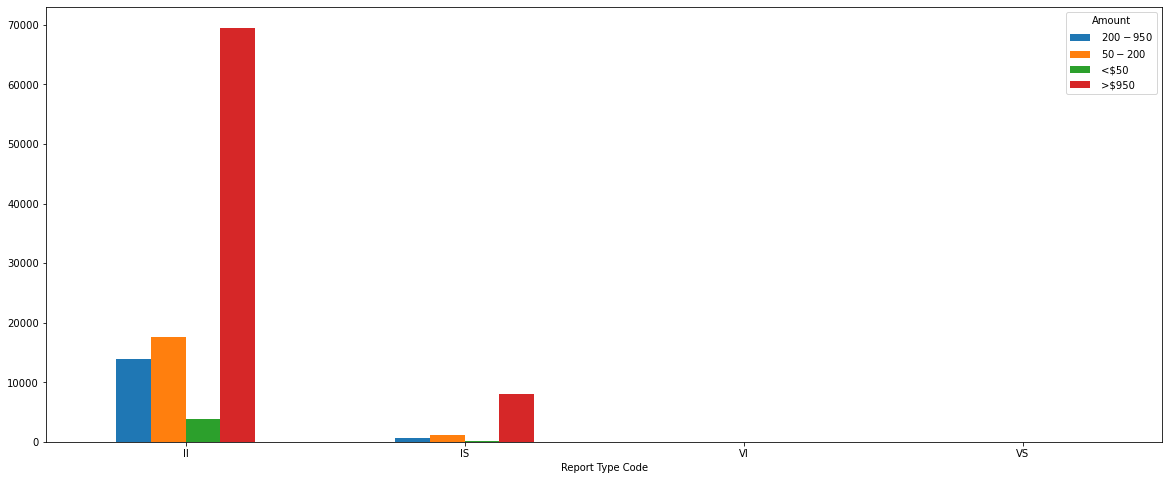

In [ ]:
CrosstabResult=pd.crosstab(index=df['Report Type Code'],columns=df['Amount'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(20,8), rot=0)

Amount         $200-$950   $50-$200   <$50   >$950
Filed Online                                      
0                  14308       6592   4033   22887
1                    185      12144      0   54739


<AxesSubplot:xlabel='Filed Online'>

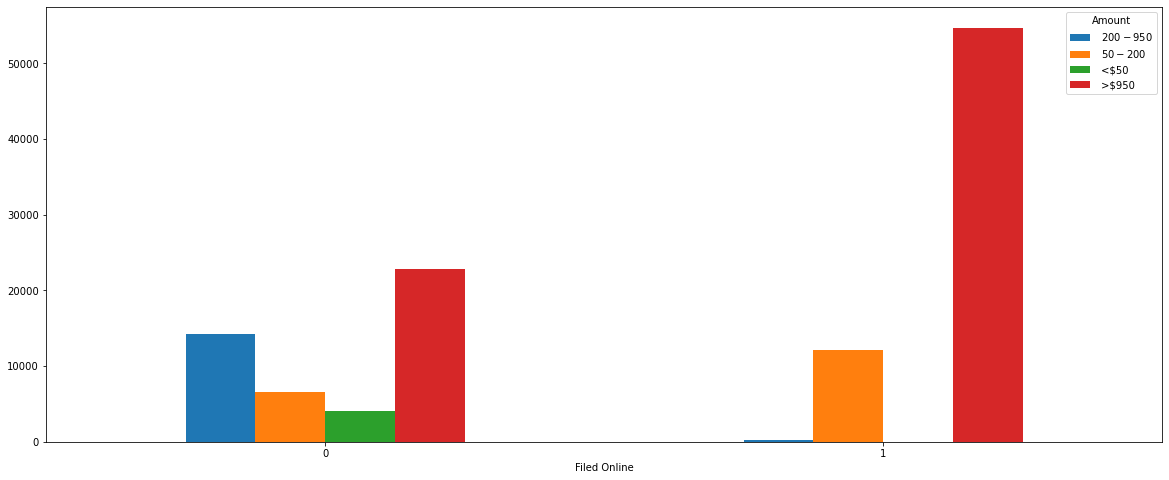

In [ ]:
CrosstabResult=pd.crosstab(index=df['Filed Online'],columns=df['Amount'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(20,8), rot=0)

Amount                $200-$950   $50-$200   <$50   >$950
Supervisor District                                      
0.0                          46       2210      3    9471
1.0                         814        795    193    4686
2.0                        1396       1494    342    8677
3.0                        3684       3482    719   12973
4.0                         359        406    160    1406
5.0                        1485       1794    410   10753
6.0                        2503       3157    687   10946
7.0                         790        908    247    2972
8.0                        1025       1564    330    5374
9.0                        1055       1327    376    4564
10.0                        944       1164    373    4829
11.0                        392        435    193     975


<AxesSubplot:xlabel='Supervisor District'>

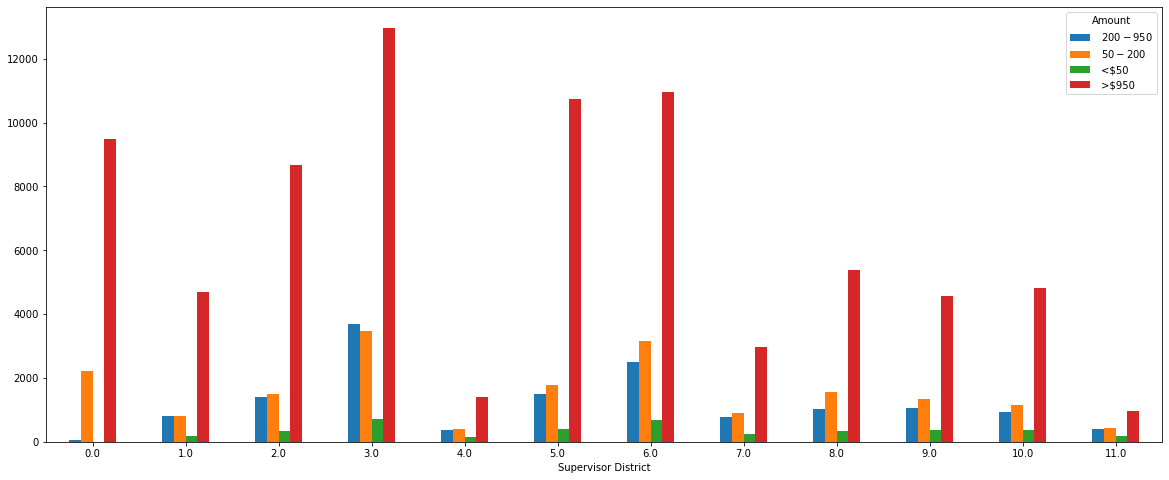

In [ ]:
CrosstabResult=pd.crosstab(index=df['Supervisor District'],columns=df['Amount'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(20,8), rot=0)

Amount      $200-$950   $50-$200   <$50   >$950
time_hour                                      
0                 418       1025    157    3824
1                 218        534     83    1948
2                 142        278     74    1246
3                 139        204     62     870
4                 132        155     55     609
5                 124        176     43     622
6                 136        210     66     873
7                 227        339     95    1099
8                 397        640    151    1773
9                 499        681    164    2316
10                765        912    198    3311
11                897       1024    206    3926
12               1134       1285    297    4350
13                945       1119    224    3993
14                956       1199    250    3864
15               1041       1238    233    3799
16                958       1166    265    3914
17               1026       1297    291    4864
18               1116       1307    280 

<AxesSubplot:xlabel='time_hour'>

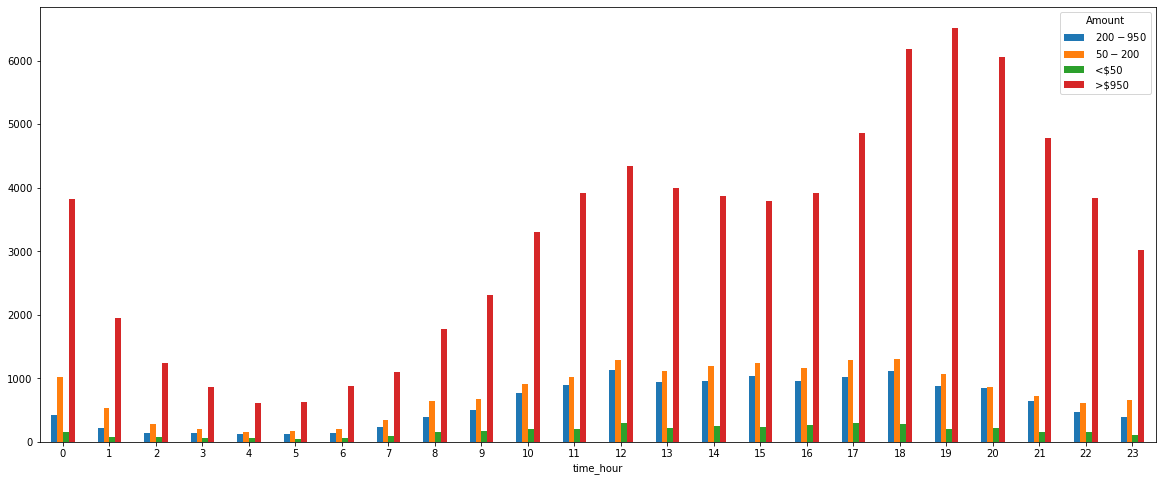

In [ ]:
CrosstabResult=pd.crosstab(index=df['time_hour'],columns=df['Amount'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(20,8), rot=0)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Incident Datetime', 'Incident Date',
       'Incident Time', 'Incident Year', 'Incident Day of Week',
       'Report Datetime', 'Row ID', 'Incident ID', 'Incident Number',
       'Report Type Code', 'Report Type Description', 'Filed Online',
       'Incident Code', 'Incident Category', 'Incident Subcategory',
       'Incident Description', 'Resolution', 'Intersection', 'CNN',
       'Police District', 'Analysis Neighborhood', 'Supervisor District',
       'Latitude', 'Longitude', 'Point', 'Neighborhoods',
       'Current Supervisor Districts', 'Current Police Districts',
       'Incident Month', 'time_hour', 'Incident Category_encoded',
       'Incident Subcategory_encoded', 'Incident Description_encoded',
       'Incident Day of Week_encoded', 'Police District_encoded',
       'Incident Datetime_encoded', 'Resolution_encoded',
       'Intersection_encoded'],
      dtype='object')

In [ ]:
X = df[['Incident Subcategory_encoded' ,'CNN', 'Police District_encoded', 'Supervisor District','Incident Datetime_encoded', 'Neighborhoods','time_hour']]
y = df['Amount']

In [ ]:
# example of chi squared feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
 
# load the dataset

# load the dataset as a pandas DataFrame
data = df[['Incident Day of Week','Analysis Neighborhood','time_hour','Incident Month','Police District','Supervisor District','Incident Subcategory']]
# retrieve numpy array
dataset = data.values
# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]
# format all fields as string
X = X.astype(str)

# load the dataset
# def load_dataset(filename):
# 	# load the dataset as a pandas DataFrame
# 	data = read_csv('clean_data.csv')
# 	# retrieve numpy array
# 	dataset = data.values
# 	# split into input (X) and output (y) variables
# 	X = dataset[:, :-1]
# 	y = dataset[:,-1]
# 	# format all fields as string
# 	X = X.astype(str)
# 	return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k=2)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
# X, y = load_dataset('clean_data.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i],fs.pvalues_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()



TypeError: not all arguments converted during string formatting

In [ ]:
print(X.shape[1])

6


In [ ]:
df_new = df.dropna(subset=['Intersection'])
df_new.isnull().sum()
df_new.shape

Unnamed: 0                       0
Incident Datetime                0
Incident Date                    0
Incident Time                    0
Incident Year                    0
Incident Day of Week             0
Report Datetime                  0
Row ID                           0
Incident ID                      0
Incident Number                  0
Report Type Code                 0
Report Type Description          0
Filed Online                     0
Incident Code                    0
Incident Category                1
Incident Subcategory             1
Incident Description             0
Resolution                       0
Intersection                     0
CNN                              0
Police District                  0
Analysis Neighborhood           10
Supervisor District              0
Latitude                         0
Longitude                        0
Point                            0
Neighborhoods                    0
Current Supervisor Districts     0
Current Police Distr

(123358, 37)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Incident Datetime', 'Incident Date',
       'Incident Time', 'Incident Year', 'Incident Day of Week',
       'Report Datetime', 'Row ID', 'Incident ID', 'Incident Number',
       'Report Type Code', 'Report Type Description', 'Filed Online',
       'Incident Code', 'Incident Category', 'Incident Subcategory',
       'Incident Description', 'Resolution', 'Intersection', 'CNN',
       'Police District', 'Analysis Neighborhood', 'Supervisor District',
       'Latitude', 'Longitude', 'Point', 'Neighborhoods',
       'Current Supervisor Districts', 'Current Police Districts',
       'Incident Month', 'time_hour', 'Incident Category_encoded',
       'Incident Subcategory_encoded', 'Incident Description_encoded',
       'Incident Day of Week_encoded', 'Police District_encoded',
       'Incident Datetime_encoded', 'Resolution_encoded',
       'Intersection_encoded'],
      dtype='object')

In [ ]:
df['Amount'].value_counts()

 >$950        92909
 $50-$200     21874
 $200-$950    17341
 <$50          4937
Name: Amount, dtype: int64

In [ ]:
df = df.dropna(subset=['Intersection'])
df = df.dropna(subset=['CNN'])
df.isnull().sum()


Unnamed: 0                      0
Incident Datetime               0
Incident Date                   0
Incident Time                   0
Incident Year                   0
Incident Day of Week            0
Report Datetime                 0
Row ID                          0
Incident ID                     0
Incident Number                 0
Report Type Code                0
Report Type Description         0
Filed Online                    0
Incident Code                   0
Incident Category               0
Incident Subcategory            0
Incident Description            0
Resolution                      0
Intersection                    0
CNN                             0
Police District                 0
Analysis Neighborhood           5
Supervisor District             0
Latitude                        0
Longitude                       0
Point                           0
Neighborhoods                   0
Current Supervisor Districts    0
Current Police Districts        0
Incident Categ

In [ ]:
X = df[['Incident Subcategory_encoded' ,'CNN', 'Police District_encoded', 'Supervisor District', 'Neighborhoods','Incident Datetime_encoded']]
y = df['Amount']


In [ ]:


# chc=SelectKBest(score_func=chi2,k=21)
# chc.fit(X_loan,y_loan)
# features_score_pvalue=pd.DataFrame({"Score":chc.scores_,"P_Value":np.round(chc.pvalues_,3)},index=X_loan.columns)
# features_score_pvalue.nlargest(n=21,columns="Score")

ch2c=SelectKBest(score_func=chi2,k=3)
ch2c.fit(X.values,y.values)
features_score_pvalue=pd.DataFrame({"Score":ch2c.scores_,"P_Value":np.round(ch2c.pvalues_,3)},index=X.columns)
features_score_pvalue.nlargest(n=10,columns="Score")

SelectKBest(k=3, score_func=<function chi2 at 0x0000025576239E50>)

,Score,P_Value
CNN,4.902780e+07,0.0
Incident Datetime_encoded,1.536718e+05,0.0
Neighborhoods,3.658202e+03,0.0
Incident Subcategory_encoded,2.559804e+03,0.0
Supervisor District,6.286244e+02,0.0
Police District_encoded,1.599877e+02,0.0


In [ ]:
!pip install imblearn

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train_re,Y_train_re  = smote.fit_resample(x_train, y_train)
# X = pd.DataFrame(X_train_re)
# Y = pd.DataFrame(Y_train_re)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_re,Y_train_re  = smote.fit_resample(x_train, y_train)
X = pd.DataFrame(X_train_re)
Y = pd.DataFrame(Y_train_re)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [ ]:
x_train.shape

(91910, 6)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
print(f"Accuracy Score of Logistic Regression : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

LogisticRegression()

C:\Users\phant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score of Logistic Regression : 0.6608181465684374
Confusion Matrix : 
[[    0     0     0  2844]
 [    0     0     0  3330]
 [    0     0     0   824]
 [    0     0     0 13634]]
Classification Report : 
              precision    recall  f1-score   support

   $200-$950       0.00      0.00      0.00      2844
    $50-$200       0.00      0.00      0.00      3330
        <$50       0.00      0.00      0.00       824
       >$950       0.66      1.00      0.80     13634

    accuracy                           0.66     20632
   macro avg       0.17      0.25      0.20     20632
weighted avg       0.44      0.66      0.53     20632



C:\Users\phant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\phant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1008x1008 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Confusion matrix')

Text(105.0, 0.5, 'True class')

Text(0.5, 105.0, 'Predicted class')

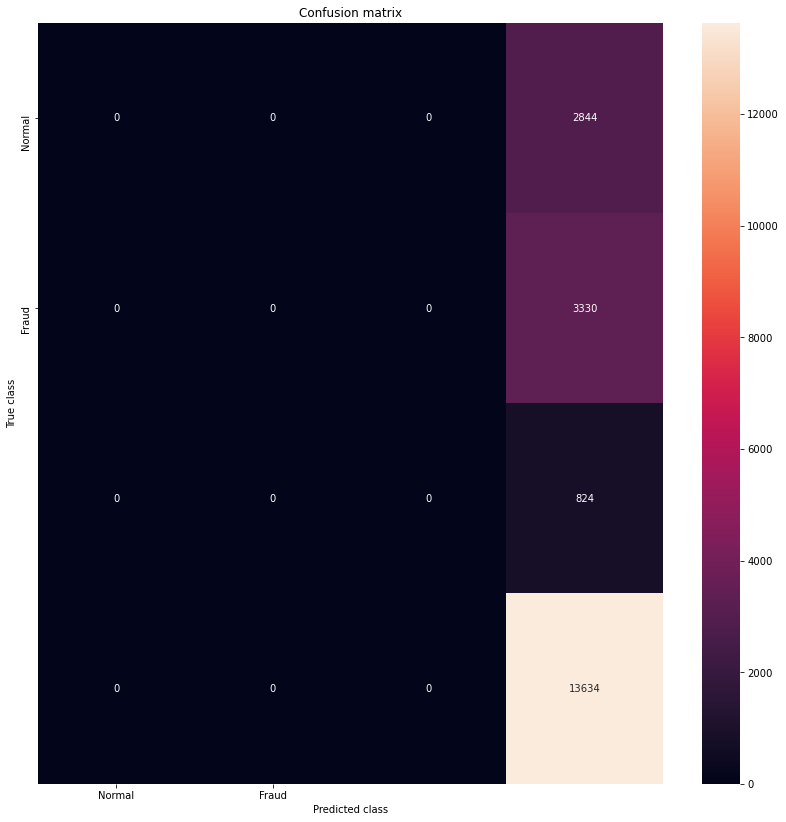

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(14, 14))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
print(f"Accuracy Score of Random Forest : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

RandomForestClassifier()

Accuracy Score of Random Forest : 0.6617390461419155
Confusion Matrix : 
[[  717   282   114  1731]
 [  388  1435   124  1383]
 [  137   119   101   467]
 [  919  1138   177 11400]]
Classification Report : 
              precision    recall  f1-score   support

   $200-$950       0.33      0.25      0.29      2844
    $50-$200       0.48      0.43      0.46      3330
        <$50       0.20      0.12      0.15       824
       >$950       0.76      0.84      0.80     13634

    accuracy                           0.66     20632
   macro avg       0.44      0.41      0.42     20632
weighted avg       0.63      0.66      0.65     20632



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
print(f"Accuracy Score of K-Nearest Neighbors : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

KNeighborsClassifier()

Accuracy Score of K-Nearest Neighbors : 0.6299922450562233
Confusion Matrix : 
[[  589   409    50  1796]
 [  464   995    79  1792]
 [  119   168    39   498]
 [  935  1217   107 11375]]
Classification Report : 
              precision    recall  f1-score   support

   $200-$950       0.28      0.21      0.24      2844
    $50-$200       0.36      0.30      0.33      3330
        <$50       0.14      0.05      0.07       824
       >$950       0.74      0.83      0.78     13634

    accuracy                           0.63     20632
   macro avg       0.38      0.35      0.35     20632
weighted avg       0.59      0.63      0.60     20632

